In [1]:
# Make sure to include this identifier at the beginning of your submission
teamname = "Hilbert's Qerudites"
task = 'part 1'

In [2]:
!pip install scikit-learn

  Using cached scikit_learn-1.2.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [3]:
import qiskit
from qiskit import quantum_info
from qiskit.execute_function import execute
from qiskit import BasicAer
import numpy as np
import pickle
import json
import os
from collections import Counter
from sklearn.metrics import mean_squared_error
from typing import Dict, List
import matplotlib.pyplot as plt

#define utility functions

def simulate(circuit: qiskit.QuantumCircuit) -> dict:
    """Simulate the circuit, give the state vector as the result."""
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    state_vector = result.get_statevector()
    
    histogram = dict()
    for i in range(len(state_vector)):
        population = abs(state_vector[i]) ** 2
        if population > 1e-9:
            histogram[i] = population
    
    return histogram


def histogram_to_category(histogram):
    """This function take a histogram representations of circuit execution results, and process into labels as described in 
    the problem description."""
    assert abs(sum(histogram.values())-1)<1e-8
    positive=0
    for key in histogram.keys():
        digits = bin(int(key))[2:].zfill(20)
        if digits[-1]=='0':
            positive+=histogram[key]
        
    return positive


def count_gates(circuit: qiskit.QuantumCircuit) -> Dict[int, int]:
    """Returns the number of gate operations with each number of qubits."""
    counter = Counter([len(gate[1]) for gate in circuit.data])
    #feel free to comment out the following two lines. But make sure you don't have k-qubit gates in your circuit
    #for k>2
    for i in range(2,20):
        assert counter[i]==0
        
    return counter


def image_mse(image1,image2):
    # Using sklearns mean squared error:
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
    return mean_squared_error(image1, image2)

In [55]:
#load the mock data (for testing only)
files=os.listdir("mock_data")
dataset=list()
for file in files:
    with open('mock_data/'+file, "r") as infile:
        loaded = json.load(infile)
        dataset.append(loaded)

True


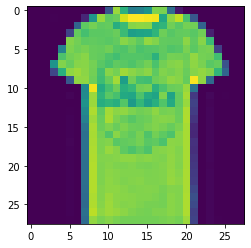

In [60]:
#load the actual hackthon data (fashion-mnist)
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')
#you can visualize it
k=shirts[56]
plt.imshow(images[k])
print(labels[k])

In [8]:
len(images)

2000

In [9]:
len([i for i, x in enumerate(labels) if not x])

1500

In [10]:
np.where(labels)[0].shape

(500,)

In [11]:
not_shirts=[i for i, x in enumerate(labels) if not x]
shirts=[i for i, x in enumerate(labels) if x]

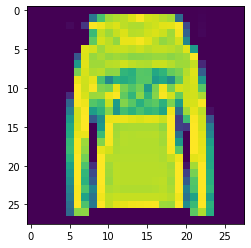

In [12]:
plt.imshow(images[not_shirts[13]])

In [13]:
x=images[not_shirts[13]][14:,:]

In [14]:
x.shape

(14, 28)

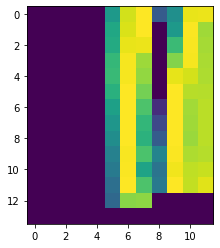

In [15]:
plt.imshow(x[:,:12])

In [16]:
# plt.imshow(x[:,16:])

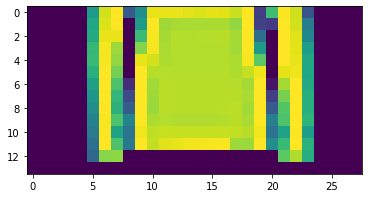

In [17]:
plt.imshow(x)

In [18]:
# len([i for i, x in enumerate(labels) if not x])

True


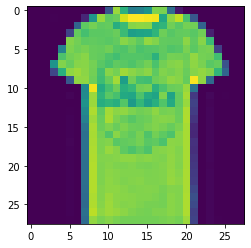

In [22]:
#load the actual hackthon data (fashion-mnist)
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')
#you can visualize it
k=shirts[56]
plt.imshow(images[k])
print(labels[k])

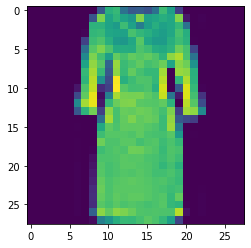

In [70]:
plt.imshow(images[1005])

In [68]:
images[1002]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.39907728e-03,
        1.41484045e-03, 6.61284121e-04, 4.15224913e-04, 3.53710111e-04,
        9.99615532e-04, 4.15224913e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.24529027e-03, 1.99923106e-03, 1.66089965e-03, 1.90695886e-03,
        8.15071126e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [46]:
img = images[2]

In [36]:
img.shape

(28, 28)

In [37]:
# img

In [73]:
print(labels[60])

True


In [47]:
img.shape

(28, 28)

In [51]:
img[14:,:].shape

(14, 28)

In [57]:
#submission to part 1, you should make this into a .py file

# n=len(dataset)
# mse=0
# gatecount=0

# # Functions 'encode' and 'decode' are dummy.
# def encode(image):
#     q = qiskit.QuantumRegister(3)
#     circuit = qiskit.QuantumCircuit(q)
#     if image[0][0]==0:
#         circuit.rx(np.pi,0)
#     return circuit

# def decode(histogram):
#     if 1 in histogram.keys():
#         image=[[0,0],[0,0]]
#     else:
#         image=[[1,1],[1,1]]
#     return image

# def run_part1(image):
#     #encode image into a circuit
#     circuit=encode(image)

#     #simulate circuit
#     histogram=simulate(circuit)

#     #reconstruct the image
#     image_re=decode(histogram)

#     return circuit,image_re

In [ ]:
#submission to part 1, you should make this into a .py file

n=len(dataset)
mse=0
gatecount=0

# Functions 'encode' and 'decode' are dummy.
def encode(image):
    q = qiskit.QuantumRegister(14)
    circuit = qiskit.QuantumCircuit(q)
    x=image[14:,:]
    x[x!=0.0]=1.0
    sum_x=list(np.sum(x,axis=1))
    sum_x=[x/28 for x in sum_x]
    for i in range(14):
        circuit.rx(sum_x[i]*np.pi,i)
    return circuit

def decode(histogram):
    if 1 in histogram.keys():
        image=np.full((28,28), 0)
    else:
        image=np.full((28,28), 1)
    return image

def run_part1(image):
    #encode image into a circuit
    circuit=encode(image)

    #simulate circuit
    histogram=simulate(circuit)

    #reconstruct the image
    image_re=decode(histogram)

    return circuit,image_re

In [59]:
# dataset

In [58]:
#how we grade your submission

n=len(dataset)
mse=0
gatecount=0

for data in dataset:
    #encode image into circuit
    circuit,image_re=run_part1(data['image'])
    
    #count the number of 2qubit gates used
    gatecount+=count_gates(circuit)[2]
    
    #calculate mse
    mse+=image_mse(data['image'],image_re)
    
#fidelity of reconstruction
f=1-mse
gatecount=gatecount/n

#score for part1 
print(f*(0.999**gatecount))

1.0
